## Team members:

Bailey Brown 

Karan Edikala

Mahalavanya Sriram

Meghana Kethidi

Shravya Donthisaram

In [87]:
# Loading the required packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno 

In [88]:
# Importing all the datasets required
covid_food_data = pd.read_csv("covid_food_supply.csv")

## Data description

In [89]:
# Checking for the number of rows and columns in a dataset.
covid_food_data.shape

(170, 32)

In [90]:
# Checking the attributes in the dataset
covid_food_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       170 non-null    object 
 1   Alcoholic Beverages           170 non-null    float64
 2   Animal fats                   170 non-null    float64
 3   Animal Products               170 non-null    float64
 4   Aquatic Products, Other       170 non-null    float64
 5   Cereals - Excluding Beer      170 non-null    float64
 6   Eggs                          170 non-null    float64
 7   Fish, Seafood                 170 non-null    float64
 8   Fruits - Excluding Wine       170 non-null    float64
 9   Meat                          170 non-null    float64
 10  Milk - Excluding Butter       170 non-null    float64
 11  Miscellaneous                 170 non-null    float64
 12  Offals                        170 non-null    float64
 13  Oilcr

In [91]:
#to display all the columns
pd.options.display.max_columns = None
# Prints the top 5 rows of the dataset
covid_food_data.head()

,Country,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,Miscellaneous,Offals,Oilcrops,Pulses,Spices,Starchy Roots,Stimulants,Sugar & Sweeteners,Sugar Crops,Treenuts,Vegetable Oils,Vegetables,Vegetal Products,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,0.0014,0.1973,9.4341,0.0,24.8097,0.2099,0.0350,5.3495,1.2020,7.5828,0.0728,0.2057,0.0700,0.2953,0.0574,0.8802,0.3078,1.3489,0.0,0.0770,0.5345,6.7642,40.5645,4.5,29.8,0.091130,0.003034,0.060712,0.027384,38928000.0,%
1,Albania,1.6719,0.1357,18.7684,0.0,5.7817,0.5815,0.2126,6.7861,1.8845,15.7213,0.1123,0.2324,0.9377,0.2380,0.0008,1.8096,0.1055,1.5367,0.0,0.1515,0.3261,11.7753,31.2304,22.3,6.2,0.144116,0.003946,0.081431,0.058739,2838000.0,%
2,Algeria,0.2711,0.0282,9.6334,0.0,13.6816,0.5277,0.2416,6.3801,1.1305,7.6189,0.1671,0.0870,0.3493,0.4783,0.0557,4.1340,0.2216,1.8342,0.0,0.1152,1.0310,11.6484,40.3651,26.6,3.9,0.052041,0.002430,0.036186,0.013425,44357000.0,%
3,Angola,5.8087,0.0560,4.9278,0.0,9.1085,0.0587,1.7707,6.0005,2.0571,0.8311,0.1165,0.1550,0.4186,0.6507,0.0009,18.1102,0.0508,1.8495,0.0,0.0061,0.6463,2.3041,45.0722,6.8,25,0.002168,0.000089,0.000680,0.001399,32522000.0,%
4,Antigua and Barbuda,3.5764,0.0087,16.6613,0.0,5.9960,0.2274,4.1489,10.7451,5.6888,6.3663,0.7139,0.2219,0.2172,0.1840,0.1524,1.4522,0.1564,3.8749,0.0,0.0253,0.8102,5.4495,33.3233,19.1,NaN,0.077551,0.003061,0.058163,0.016327,98000.0,%


In [92]:
# Prints the bottom 5 rows of the dataset
covid_food_data.tail()

,Country,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,Miscellaneous,Offals,Oilcrops,Pulses,Spices,Starchy Roots,Stimulants,Sugar & Sweeteners,Sugar Crops,Treenuts,Vegetable Oils,Vegetables,Vegetal Products,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
165,Venezuela (Bolivarian Republic of),2.5952,0.0403,14.7565,0.0000,12.9253,0.3389,0.9456,7.6460,3.8328,9.3920,0.0702,0.2078,0.0281,0.3342,0.0009,2.5643,0.1479,3.4106,0.000,0.0009,1.3734,4.1474,35.2416,25.2,21.2,0.041512,0.000391,0.013866,0.027254,28645000.0,%
166,Vietnam,1.4591,0.1640,8.5765,0.0042,16.8740,0.3077,2.6392,5.9029,4.4382,0.6069,0.0126,0.4149,0.8410,0.2032,0.2074,1.0596,0.2880,1.2846,0.815,0.3070,0.2201,11.9508,41.4232,2.1,9.3,0.000398,0.000000,0.000371,0.000027,96209000.0,%
167,Yemen,0.0364,0.0446,5.7874,0.0000,27.2077,0.2579,0.5240,5.1344,2.7871,1.8911,0.2033,0.2827,0.0893,0.8645,0.0347,1.0794,0.2199,5.0468,0.000,0.0017,1.0811,3.2135,44.2126,14.1,38.9,0.005385,0.001492,0.002387,0.001505,29826000.0,%
168,Zambia,5.7360,0.0829,6.0197,0.0000,21.1938,0.3399,1.6924,1.0183,1.8427,1.7570,0.2149,0.3048,1.8736,0.1756,0.0478,7.9649,0.0618,1.5632,0.000,0.0014,0.6657,3.4649,43.9789,6.5,46.7,0.016210,0.000653,0.007953,0.007604,18384000.0,%
169,Zimbabwe,4.0552,0.0755,8.1489,0.0000,22.6240,0.2678,0.5518,2.2000,2.6142,4.4310,0.2012,0.2086,0.4498,0.4261,0.0252,2.9870,0.1494,4.6485,0.000,0.0518,1.7103,2.3213,41.8526,12.3,51.3,0.010839,0.000168,0.003176,0.007495,14863000.0,%


In [93]:
# checking the statistical summary of the dataset 
covid_food_data.describe()

,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,Miscellaneous,Offals,Oilcrops,Pulses,Spices,Starchy Roots,Stimulants,Sugar & Sweeteners,Sugar Crops,Treenuts,Vegetable Oils,Vegetables,Vegetal Products,Obesity,Confirmed,Deaths,Recovered,Active,Population
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,167.000000,161.000000,161.000000,161.000000,159.000000,1.700000e+02
mean,3.022971,0.221064,12.181871,0.013994,11.800347,0.470570,1.387195,5.621405,3.375934,6.519776,0.443122,0.193435,0.818120,0.537131,0.091011,5.335371,0.201946,2.799115,0.095846,0.117474,0.851554,6.085912,37.814834,18.707784,0.219348,0.007617,0.138154,0.069656,4.452364e+07
std,2.382243,0.278304,5.852635,0.129382,5.824870,0.331209,1.257382,3.152849,1.762911,5.020379,0.685727,0.159634,1.772273,0.601111,0.121898,5.571355,0.189239,1.545951,0.379936,0.146143,0.445335,3.560148,5.852943,9.633557,0.308249,0.014153,0.223507,0.113325,1.564182e+08
min,0.000000,0.001000,1.739100,0.000000,3.401400,0.023900,0.034200,0.659600,0.356000,0.096300,0.000000,0.000000,0.009800,0.000000,0.000000,0.679600,0.004200,0.366600,0.000000,0.000000,0.091500,0.857000,23.113200,2.100000,0.000262,0.000000,0.000000,0.000000,5.400000e+04
25%,0.895625,0.040225,7.236850,0.000000,7.226850,0.187575,0.557100,3.541950,1.891475,2.172250,0.032325,0.105050,0.134075,0.129650,0.016500,2.023825,0.083325,1.721025,0.000000,0.020750,0.507700,3.616500,33.552775,8.500000,0.024946,0.000391,0.010558,0.003618,2.816250e+06
50%,2.866150,0.116850,12.097550,0.000000,10.142750,0.460150,1.029250,5.021250,3.424750,5.336900,0.196850,0.166800,0.326650,0.300800,0.042550,3.108650,0.159450,2.601650,0.000000,0.079950,0.774450,5.028100,37.900700,21.200000,0.079866,0.001902,0.041671,0.015089,1.018150e+07
75%,4.710950,0.253900,16.444125,0.001400,15.148950,0.644150,1.821275,6.827750,4.422450,10.407100,0.583625,0.228575,0.691675,0.734900,0.123150,5.745875,0.261800,3.782150,0.000000,0.148650,1.070900,7.801650,42.762775,25.700000,0.300331,0.006747,0.175000,0.077692,3.271625e+07
max,15.370600,1.355900,26.886500,1.679400,29.804500,1.696000,8.795900,19.302800,8.170000,20.837800,3.663400,1.225600,12.176300,3.483800,0.662600,27.712800,1.282300,9.725900,3.067700,0.756900,2.202600,19.299500,48.258500,45.600000,1.699692,0.085106,1.550046,0.690585,1.402385e+09


## Data Cleaning and Pre-processing

In [94]:
#Check for nulls in the dataset and count for the num
covid_food_data.isna().sum()

Country                          0
Alcoholic Beverages              0
Animal fats                      0
Animal Products                  0
Aquatic Products, Other          0
Cereals - Excluding Beer         0
Eggs                             0
Fish, Seafood                    0
Fruits - Excluding Wine          0
Meat                             0
Milk - Excluding Butter          0
Miscellaneous                    0
Offals                           0
Oilcrops                         0
Pulses                           0
Spices                           0
Starchy Roots                    0
Stimulants                       0
Sugar & Sweeteners               0
Sugar Crops                      0
Treenuts                         0
Vegetable Oils                   0
Vegetables                       0
Vegetal Products                 0
Obesity                          3
Undernourished                   7
Confirmed                        9
Deaths                           9
Recovered           

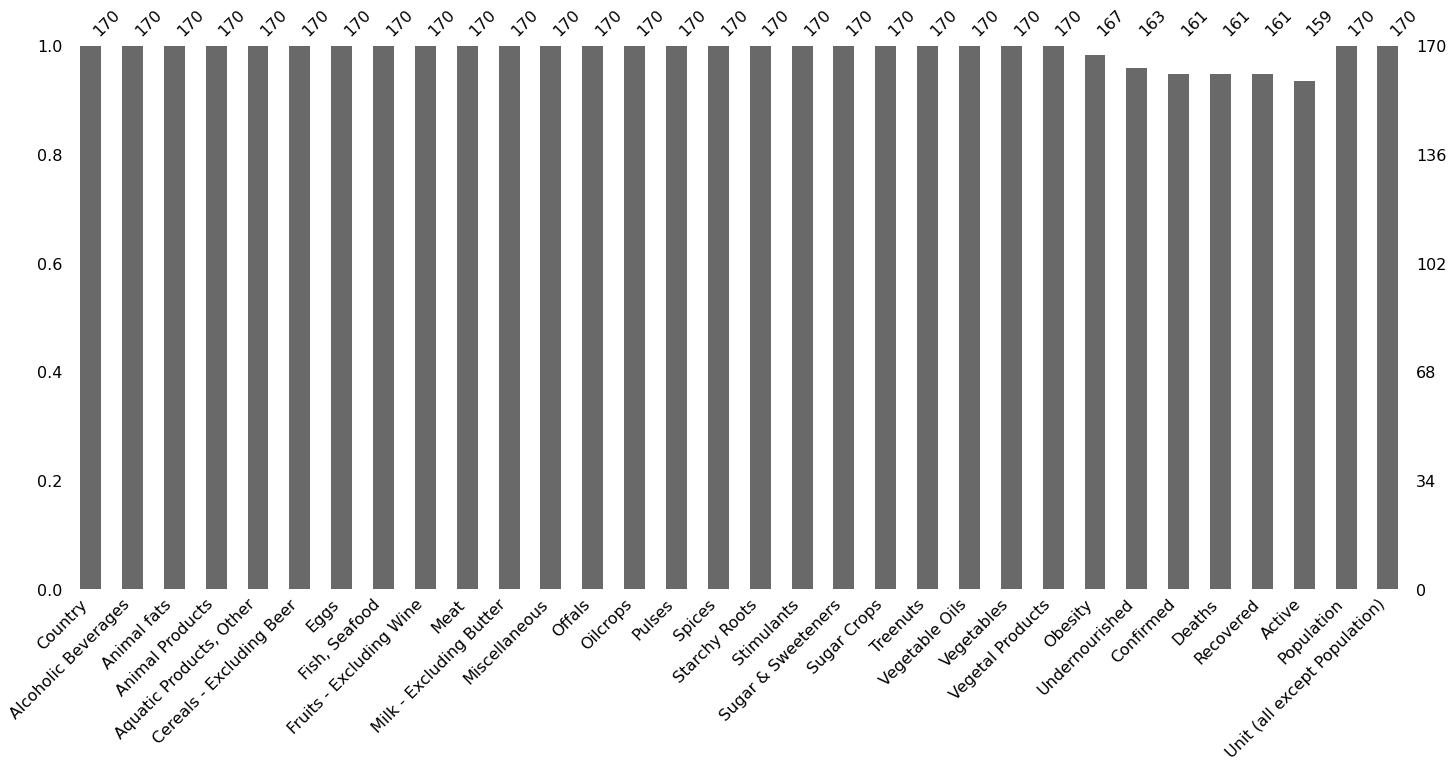

In [95]:
#Check for nulls in the dataset visually
msno.bar(covid_food_data) 

#### Handling missing values in the columns Obesity, Undernourished, Confirmed, Deaths, Recovered, Active

In [96]:
#manupilating the column missing values with their mean
#the missing values of obesity cannot be zero so its replaced by the mean of the column
covid_food_data['Obesity'].fillna((covid_food_data['Obesity'].mean()), inplace=True)

# the column Undernourished is of type 'object' and it has entries '<2.5'
#replacing <2.5 with 2.5 and changing the object type to float
covid_food_data['Undernourished'] = covid_food_data['Undernourished'].replace(['<2.5'],2.5)
covid_food_data['Undernourished'] = covid_food_data['Undernourished'].astype('float64') 
covid_food_data['Undernourished'].dtype

# replacing the missing values with the mean
covid_food_data['Undernourished'].fillna((covid_food_data['Undernourished'].mean()), inplace=True)

In [97]:
# dropping rows that has missing values for confirmed deaths and recovered columns. 
# Since most of them are geographically dispersed islands and are not affected by covid
covid_food_data.dropna(axis=0,subset = ['Confirmed', 'Deaths'], inplace=True)

In [98]:
# handling the missing values for 'Active'
# we have the confirmed covid cases, deaths and recovered
#Replacing the missing values in the 'Active' column appropriately
missing_active_cases = covid_food_data['Confirmed'] - covid_food_data['Deaths'] - covid_food_data['Recovered']
covid_food_data['Active'].fillna(missing_active_cases, inplace=True) 
covid_food_data.isna().sum()

Country                         0
Alcoholic Beverages             0
Animal fats                     0
Animal Products                 0
Aquatic Products, Other         0
Cereals - Excluding Beer        0
Eggs                            0
Fish, Seafood                   0
Fruits - Excluding Wine         0
Meat                            0
Milk - Excluding Butter         0
Miscellaneous                   0
Offals                          0
Oilcrops                        0
Pulses                          0
Spices                          0
Starchy Roots                   0
Stimulants                      0
Sugar & Sweeteners              0
Sugar Crops                     0
Treenuts                        0
Vegetable Oils                  0
Vegetables                      0
Vegetal Products                0
Obesity                         0
Undernourished                  0
Confirmed                       0
Deaths                          0
Recovered                       0
Active        

In [99]:
# Prints the bottom 5 rows of the dataset
covid_food_data.tail()

,Country,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,Miscellaneous,Offals,Oilcrops,Pulses,Spices,Starchy Roots,Stimulants,Sugar & Sweeteners,Sugar Crops,Treenuts,Vegetable Oils,Vegetables,Vegetal Products,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
165,Venezuela (Bolivarian Republic of),2.5952,0.0403,14.7565,0.0000,12.9253,0.3389,0.9456,7.6460,3.8328,9.3920,0.0702,0.2078,0.0281,0.3342,0.0009,2.5643,0.1479,3.4106,0.000,0.0009,1.3734,4.1474,35.2416,25.2,21.2,0.041512,0.000391,0.013866,0.027254,28645000.0,%
166,Vietnam,1.4591,0.1640,8.5765,0.0042,16.8740,0.3077,2.6392,5.9029,4.4382,0.6069,0.0126,0.4149,0.8410,0.2032,0.2074,1.0596,0.2880,1.2846,0.815,0.3070,0.2201,11.9508,41.4232,2.1,9.3,0.000398,0.000000,0.000371,0.000027,96209000.0,%
167,Yemen,0.0364,0.0446,5.7874,0.0000,27.2077,0.2579,0.5240,5.1344,2.7871,1.8911,0.2033,0.2827,0.0893,0.8645,0.0347,1.0794,0.2199,5.0468,0.000,0.0017,1.0811,3.2135,44.2126,14.1,38.9,0.005385,0.001492,0.002387,0.001505,29826000.0,%
168,Zambia,5.7360,0.0829,6.0197,0.0000,21.1938,0.3399,1.6924,1.0183,1.8427,1.7570,0.2149,0.3048,1.8736,0.1756,0.0478,7.9649,0.0618,1.5632,0.000,0.0014,0.6657,3.4649,43.9789,6.5,46.7,0.016210,0.000653,0.007953,0.007604,18384000.0,%
169,Zimbabwe,4.0552,0.0755,8.1489,0.0000,22.6240,0.2678,0.5518,2.2000,2.6142,4.4310,0.2012,0.2086,0.4498,0.4261,0.0252,2.9870,0.1494,4.6485,0.000,0.0518,1.7103,2.3213,41.8526,12.3,51.3,0.010839,0.000168,0.003176,0.007495,14863000.0,%


In [100]:
# it is observed that all the animal generated products specifically 'Animal fats', 'Aquatic Products, Other'
# 'Eggs','Fish, Seafood', 'Meat' + 'Milk - Excluding Butter', 'Offals' together sumup to the column Animal Products
# confirming the same with the below code
# Step1 : summing all the columns and storing them in a new column 'Summing Animal related Products'
covid_food_data['Summing Animal related Products'] = covid_food_data['Animal fats'] + covid_food_data['Aquatic Products, Other'] + covid_food_data['Eggs'] + covid_food_data['Fish, Seafood'] + covid_food_data['Meat'] + covid_food_data['Milk - Excluding Butter'] + covid_food_data['Offals']
covid_food_data['Animal Products'] = np.round(covid_food_data['Animal Products'], decimals=2)
covid_food_data['Summing Animal related Products'] = np.round(covid_food_data['Summing Animal related Products'], decimals=2)
covid_food_data.tail()

# Step2 : After aggregating, cross checking with the Animal Products column
if (covid_food_data['Animal Products'].all() == covid_food_data['Summing Animal related Products'].all()):
    print('Both the columns are same - Animal Products')
else:
    print('Both the columns are not same - Animal Products')
    
# Performing a similar analysis on the tree or plant generated products and 'vegetal Products' column
covid_food_data['Summing vegetable related Products'] = covid_food_data['Alcoholic Beverages'] + covid_food_data['Cereals - Excluding Beer'] + covid_food_data['Fruits - Excluding Wine'] + covid_food_data['Miscellaneous'] + covid_food_data['Oilcrops'] + covid_food_data['Pulses'] + covid_food_data['Spices'] + covid_food_data['Starchy Roots'] + covid_food_data['Stimulants'] + covid_food_data['Sugar & Sweeteners'] + covid_food_data['Sugar Crops'] + covid_food_data['Treenuts'] + covid_food_data['Vegetable Oils'] + covid_food_data['Vegetables']
covid_food_data['Vegetal Products'] = np.round(covid_food_data['Vegetal Products'], decimals=2)
covid_food_data['Summing vegetable related Products'] = np.round(covid_food_data['Summing vegetable related Products'], decimals=2)
covid_food_data.tail()

if (covid_food_data['Vegetal Products'].all() == covid_food_data['Summing vegetable related Products'].all()):
    print('Both the columns are same - Vegetable Products')
else:
    print('Both the columns are not same - Vegetable Products')

Both the columns are same - Animal Products
Both the columns are same - Vegetable Products


In [101]:
#Unit (all except Population) column does not have any values - This can be deleted
covid_food_data = covid_food_data.drop(['Unit (all except Population)'], axis=1)

##### From the above observation, it is clear that the animal generated products like meat, milk , eggs etc. sum up to the 'Animal Products' column and
##### Tree or plant generated products like Pulses, Cereals etc. including alcohol sum up to the 'Vegetal Products' column
##### So, for further analysis taking only the Country, Animal Products, Vegetal Products, Obesity, Undernourished, Confirmed, Deaths, Recovered, Active, Population into consideration. Moreover, it is observed that Cereals - Excluding Beer is the highly consumed product. So, including this column as well to gain more insights

In [104]:
covid_food_data2 = pd.DataFrame(covid_food_data, columns = ['Country', 'Animal Products', 'Vegetal Products', 'Obesity', 'Undernourished', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'Population'])
covid_food_data2.head()

,Country,Animal Products,Vegetal Products,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population
0,Afghanistan,9.43,40.56,4.5,29.800000,0.091130,0.003034,0.060712,0.027384,38928000.0
1,Albania,18.77,31.23,22.3,6.200000,0.144116,0.003946,0.081431,0.058739,2838000.0
2,Algeria,9.63,40.37,26.6,3.900000,0.052041,0.002430,0.036186,0.013425,44357000.0
3,Angola,4.93,45.07,6.8,25.000000,0.002168,0.000089,0.000680,0.001399,32522000.0
4,Antigua and Barbuda,16.66,33.32,19.1,11.229448,0.077551,0.003061,0.058163,0.016327,98000.0


In [106]:
# Data Reduction. Since the sample is relatively big with data of all the countries around the world, 
#inroder to reduce the storage capacity round off the values
np.round(covid_food_data2, decimals=4)

,Country,Animal Products,Vegetal Products,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population
0,Afghanistan,9.43,40.56,4.5,29.8000,0.0911,0.0030,0.0607,0.0274,38928000.0
1,Albania,18.77,31.23,22.3,6.2000,0.1441,0.0039,0.0814,0.0587,2838000.0
2,Algeria,9.63,40.37,26.6,3.9000,0.0520,0.0024,0.0362,0.0134,44357000.0
3,Angola,4.93,45.07,6.8,25.0000,0.0022,0.0001,0.0007,0.0014,32522000.0
4,Antigua and Barbuda,16.66,33.32,19.1,11.2294,0.0776,0.0031,0.0582,0.0163,98000.0
...,...,...,...,...,...,...,...,...,...,...
165,Venezuela (Bolivarian Republic of),14.76,35.24,25.2,21.2000,0.0415,0.0004,0.0139,0.0273,28645000.0
166,Vietnam,8.58,41.42,2.1,9.3000,0.0004,0.0000,0.0004,0.0000,96209000.0
167,Yemen,5.79,44.21,14.1,38.9000,0.0054,0.0015,0.0024,0.0015,29826000.0
168,Zambia,6.02,43.98,6.5,46.7000,0.0162,0.0007,0.0080,0.0076,18384000.0


## Exploratory Data Analysis

In [107]:
import warnings
warnings.filterwarnings('ignore')

##### looking for outliers in the data using boxplot

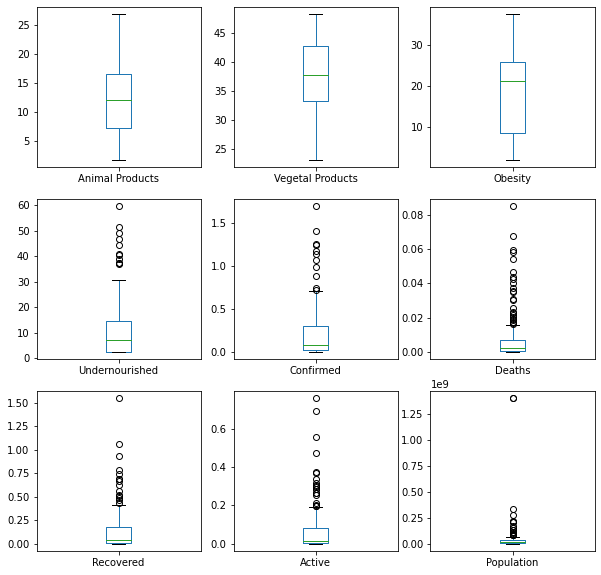

In [112]:
covid_food_data2.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(10,10))
plt.show()

###### The outliers in confirmed, deaths, recovered, active, population are not ideally outliers because, these countries are originally having less population and the no of covid cases are identified to be less

###### The following histograms show the distributions of each feature.
###### Animal Products, Obesity and Vegetal Products have a roughly normal distribution

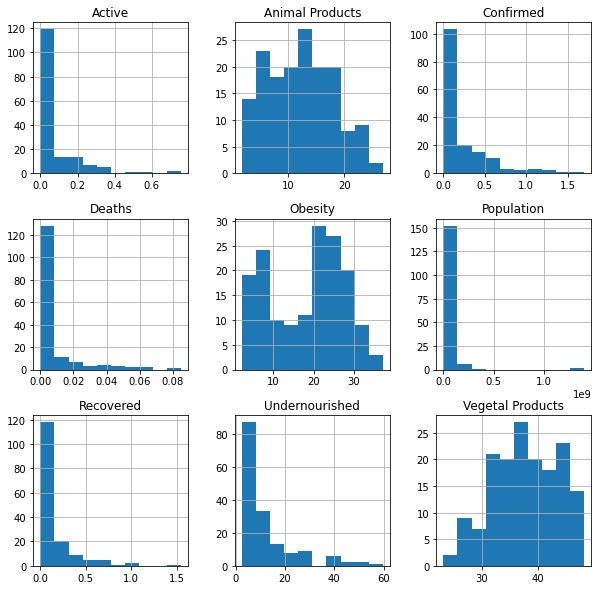

In [114]:
num=covid_food_data2.select_dtypes(include=['int64','float64'])
num.hist(figsize=(10,10))
plt.show()

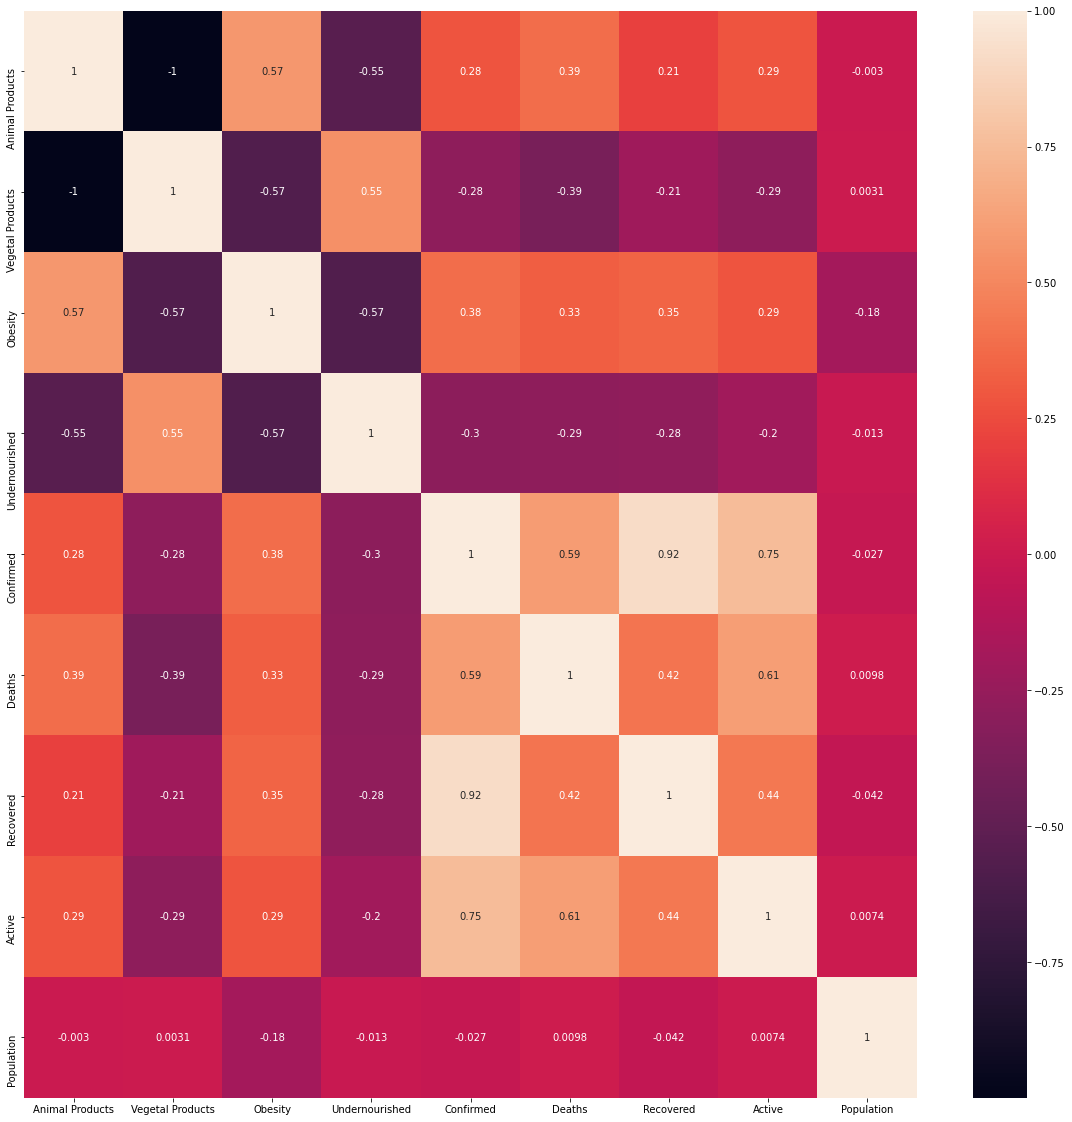

In [115]:
corr=covid_food_data2.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True)

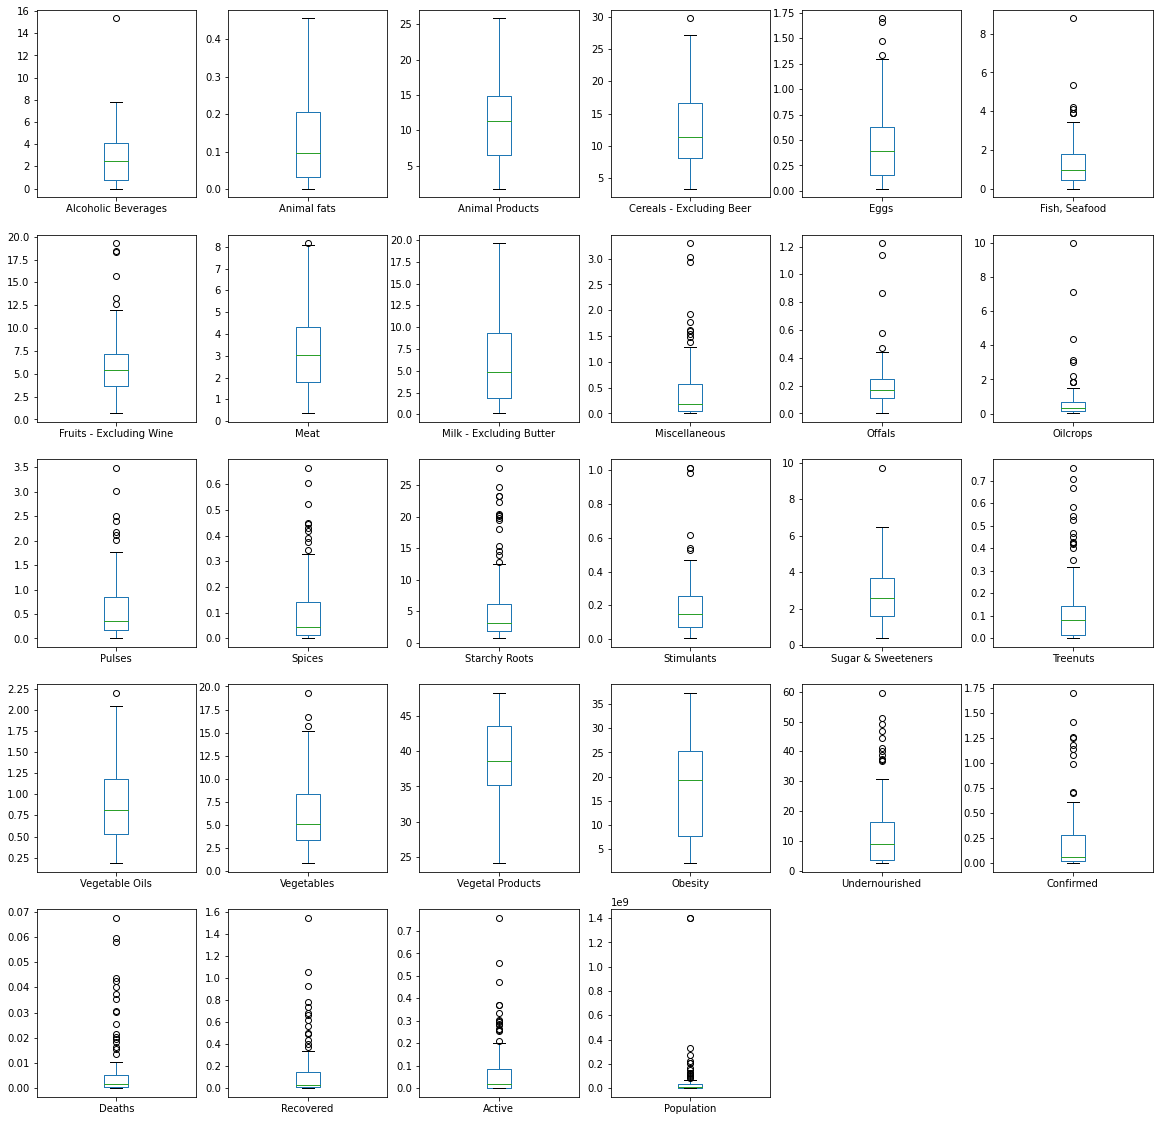

In [39]:
#Removing outliers using interquartile range
Q1 = covid_food_data['Animal fats'].quantile(0.25)
Q3 = covid_food_data['Animal fats'].quantile(0.75)
IQR = Q3 - Q1
covid_food_data = covid_food_data[covid_food_data['Animal fats'] > (Q1 - 1.5 * IQR)][:]
covid_food_data = covid_food_data[covid_food_data['Animal fats'] < (Q3 + 1.5 * IQR)][:]

# looking for outliers in the data using boxplot
covid_food_data.plot(kind='box', subplots=True, layout=(5,6), sharex=False, sharey=False, figsize=(20,20))
plt.show()